1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


Dataframe 
     feature 1  feature 2  feature 3
0    0.223979  -2.701219  -2.253261
1    0.744591  -0.980100   0.509082
2   -0.334269  -1.669443  -2.337981
3    1.389172   6.628884   9.407227
4   -2.296095  -4.706078  -9.298267
..        ...        ...        ...
95  -0.201379   3.680926   3.278168
96  -0.551718  -4.613522  -5.716959
97   1.443339   1.648389   4.535067
98  -0.676715  -2.573932  -3.927362
99   1.779924  -0.302916   3.256931

[100 rows x 3 columns]

Covariance matrix (100, 100) 
 [[ 2.48236172  1.04926097  1.42830845 ... -1.16094309  2.16601483
   0.67141313]
 [ 1.04926097  0.87461427  0.29651357 ...  0.53616795  0.33702756
   1.42427777]
 [ 1.42830845  0.29651357  1.04074958 ... -1.39976097  1.65854944
  -0.42640601]
 ...
 [-1.16094309  0.53616795 -1.39976097 ...  2.98895562 -2.39100985
   2.40259128]
 [ 2.16601483  0.33702756  1.65854944 ... -2.39100985  2.66631845
  -0.9446061 ]
 [ 0.67141313  1.42427777 -0.42640601 ...  2.40259128 -0.9446061
   3.19871458]]

Eignvalu

C:\Users\Utente\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


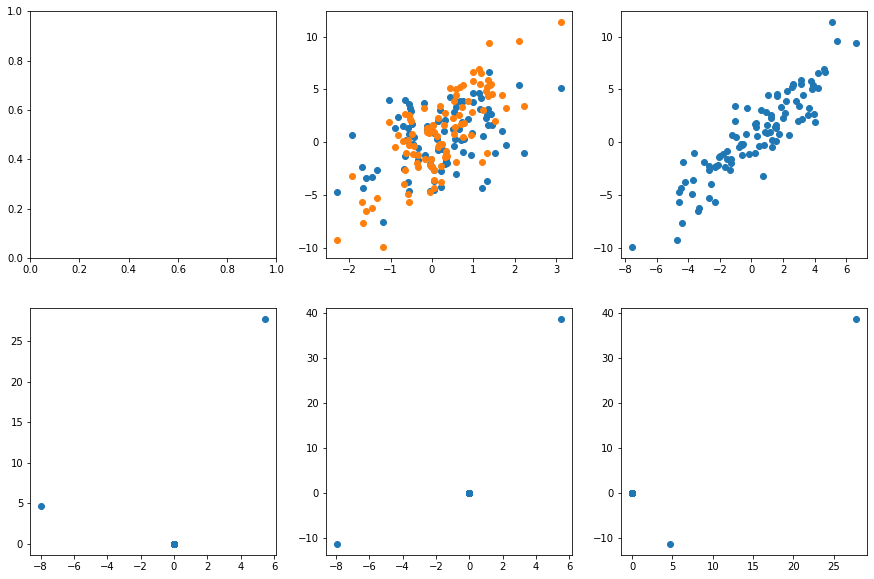

In [43]:
import pandas as pd
import numpy as np
import numpy.random as npr
from scipy import linalg as la
import matplotlib.pyplot as pl

npr.seed(54321)
N=100
x1=npr.normal(0.0, 1.0, size=N)
x2=x1+(npr.normal(0.0, 3.0, size=N))
x3=2*x1+x2

dat=pd.DataFrame(x1, columns=['feature 1'])
dat['feature 2']=x2
dat['feature 3']=x3
print("Dataframe \n", dat)

print("")

cov_m=np.cov(dat)
print("Covariance matrix", cov_m.shape, "\n", cov_m)

print("")

#Eigenvalues and eigenvectors of covariance matrix
eigval_1, eigvec_1=la.eig(cov_m)
print("Eignvalues 1", eigval_1.shape, "\n", eigval_1)
print("")
print("Eigenvectors 1", eigvec_1.shape, "\n", eigvec_1)

print("")

#Eigenvalues and eigenvectors with SVD
U, D, Vt=la.svd(dat)
eigval_2=D**2/(N-1)
eigvec_2=U
print("Eignvalues 2", eigval_2.shape, "\n", eigval_2)
print("")
print("Eigenvectors 2", eigvec_2.shape, "\n", eigvec_2)

print("")

#Data in basis of PCA procedure
dat_rot=np.dot(eigvec_1.T, dat)
print("Matrix in new basis \n", dat_rot)

pl.figure(figsize=(15, 10))

#1st row (1st basis)
pl11=pl.subplot(2, 3, 1)
pl12=pl.subplot(2, 3, 2)
pl13=pl.subplot(2, 3, 3)

pl12.scatter(dat['feature 1'], dat['feature 2'])
pl12.scatter(dat['feature 1'], dat['feature 3'])
pl13.scatter(dat['feature 2'], dat['feature 3'])

dat2=pd.DataFrame(dat_rot, columns=['feature 1', 'feature 2', 'feature 3'])

#2nd row (2nd basis)
pl21=pl.subplot(2, 3, 4)
pl22=pl.subplot(2, 3, 5)
pl23=pl.subplot(2, 3, 6)

pl21.scatter(dat2['feature 1'], dat2['feature 2'])
pl22.scatter(dat2['feature 1'], dat2['feature 3'])
pl23.scatter(dat2['feature 2'], dat2['feature 3'])

pl.show()

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [26]:
import pandas as pd
import numpy as np
import numpy.random as npr
from scipy import linalg as la

npr.seed(54321)
N=100
x1=npr.normal(0.0, 1.0, size=N)
x2=x1+(npr.normal(0.0, 3.0, size=N))
x3=2*x1+x2

dat=pd.DataFrame(x1, columns=['feature 1'])
dat['feature 2']=x2
dat['feature 3']=x3
print("Dataframe \n", dat)

print("")

sigma=3.0/50.
n1=npr.normal(0.0, sigma, size=N)
noise=np.array(n1)

for i in range(9):
    n=npr.normal(0.0, sigma, size=N)
    noise=np.vstack([noise, n])

for i in range(10):
    dat['noise {}'.format(i)]=noise[i]

#PCA
arr=dat.values
mat=np.cov(arr)

eigval, eigvec=la.eig(mat)
print("Eigenvalues: \n", eigval)
print("")
print("Eigenvectors: \n", eigvec)

Dataframe 
     feature 1  feature 2  feature 3
0    0.223979  -2.701219  -2.253261
1    0.744591  -0.980100   0.509082
2   -0.334269  -1.669443  -2.337981
3    1.389172   6.628884   9.407227
4   -2.296095  -4.706078  -9.298267
..        ...        ...        ...
95  -0.201379   3.680926   3.278168
96  -0.551718  -4.613522  -5.716959
97   1.443339   1.648389   4.535067
98  -0.676715  -2.573932  -3.927362
99   1.779924  -0.302916   3.256931

[100 rows x 3 columns]

Eigenvalues: 
 [ 1.61710051e+02+0.00000000e+00j  1.28233962e+01+0.00000000e+00j
  4.30937227e-02+0.00000000e+00j  3.54563250e-02+0.00000000e+00j
  3.28498894e-02+0.00000000e+00j  3.23140629e-02+0.00000000e+00j
  2.95357468e-02+0.00000000e+00j  2.65949845e-02+0.00000000e+00j
  2.32265228e-02+0.00000000e+00j  2.25556740e-02+0.00000000e+00j
  1.86897101e-02+0.00000000e+00j  1.21091306e-03+0.00000000e+00j
  9.74613975e-15+3.21502764e-15j  9.74613975e-15-3.21502764e-15j
 -9.00285717e-15+1.92901817e-15j -9.00285717e-15-1.92901817e-

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

In [6]:
import numpy as np

dat=np.load("C:\\Users\\Utente\\Desktop\\Lab of Computational Physics\\magic04.names" , allow_pickle=True)
print(dat)

OSError: Failed to interpret file 'C:\\Users\\Utente\\Desktop\\Lab of Computational Physics\\magic04.names' as a pickle